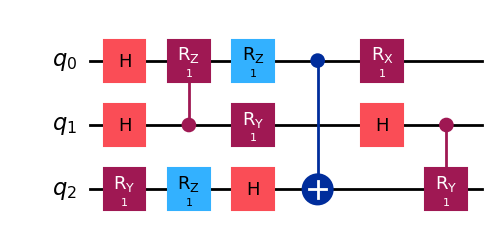

In [1]:
from qoop.core.random_circuit import generate_with_pool

qc = generate_with_pool(3, 5)
qc = qc.assign_parameters([1] * qc.num_parameters)
qc.draw('mpl')

[ 0.3376522 +0.24602851j -0.0463407 +0.16636342j  0.01691991+0.24153235j
  0.37368259+0.32259511j  0.31384112+0.07651678j  0.28001549+0.19760422j
  0.10322632+0.36766141j  0.20396913+0.28993984j]


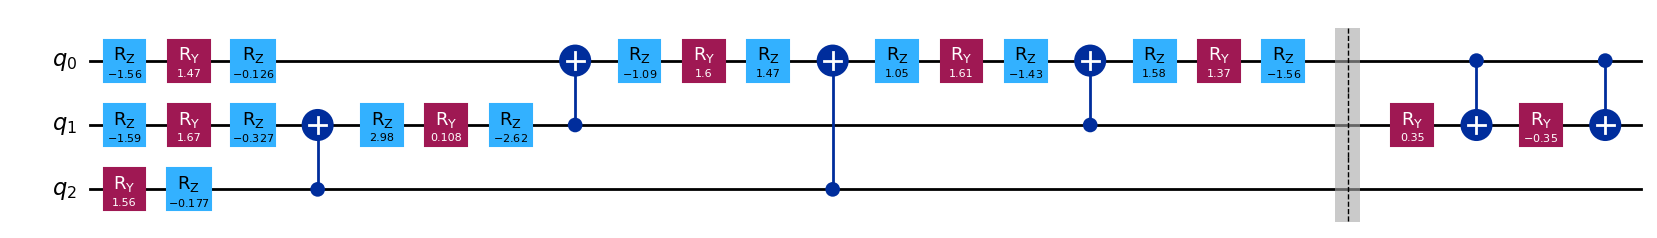

In [23]:
import qiskit
import numpy as np
import qiskit.quantum_info
state = np.random.rand(2**3) + 1j * np.random.rand(2**3)
state /= np.linalg.norm(state)

theta = 0.7
qc = qiskit.QuantumCircuit(3)

qc.prepare_state(state)
qc.barrier()
qc.cry(theta, 0, 1)
print(qiskit.quantum_info.Statevector.from_instruction(qc).data)
qc_tran = qiskit.transpile(qc, basis_gates=['cx', 'rx', 'ry', 'rz'])
qc_tran.draw('mpl')

In [24]:
from qiskit import QuantumCircuit
import numpy as np


qc = QuantumCircuit(3)

qc.prepare_state(state)
qc.barrier()
qc.ry(theta/2, 1)
qc.cx(0, 1)
qc.ry(-theta/2, 1)
qc.cx(0, 1)
print(qiskit.quantum_info.Statevector.from_instruction(qc).data)
qc.draw(output='text')


[ 0.3376522 +0.24602851j -0.0463407 +0.16636342j  0.01691991+0.24153235j
  0.37368259+0.32259511j  0.31384112+0.07651678j  0.28001549+0.19760422j
  0.10322632+0.36766141j  0.20396913+0.28993984j]


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
«     ┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                                                                                              ├»
«     │                                                                                                                                                               │»
«q_1: ┤1 State Preparation(0.33765+0.24603j,0.084604+0.26689j,0.01692+0.24153j,0.36692+0.24599j,0.31384+0.076517j,0.33298+0.28504j,0.10323+0.36766j,0.095586+0.2046j) ├»
«     │                                                                                                                                                               │»
«q_2: ┤2                                                                                                                                                              ├»
«     └───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«      ░                                    
«q_0: ─░───────────────■─────────────────■──
«      ░ ┌──────────┐┌─┴─┐┌───────────┐┌─┴─┐
«q_1: ─░─┤ Ry(0.35) ├┤ X ├┤ Ry(-0.35) ├┤ X ├
«      ░ └──────────┘└───┘└───────────┘└───┘
«q_2: ─░────────────────────────────────────
«      ░

In [11]:
from qimax import converter, circuit, splitter
num_qubits = qc.num_qubits
matrices = []
Us: list[circuit.U] = []
Usm = [] # [U_{0:m-1}, U_{1:m-1}, ... U_{m-1:m-1}]
index = 0
qasm_gates = converter.qasm_to_qasmgates(converter.qc_to_qasm(qc))
qcs = splitter.qasmgates_to_qcs2(qasm_gates)
#qcs.reverse() 
for qasmgates in qcs:
    gates = converter.qasmgates_to_gates(qasmgates)
    params_form, tensor_form = converter.gates_to_string(gates, num_qubits)
    u = circuit.U(params_form, tensor_form, index)
    if u.compare(Us) == False:
        index += 1
        u.to_matrix()
    Us.append(u)
    

In [12]:
U = Us[0].to_matrix() # => Accelarate this function
print(U)
print(U.shape)

[[0.87758255+0.j         0.        +0.j         0.        -0.47942555j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.87758255+0.j         0.        +0.j
  0.        -0.47942555j 0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        -0.47942555j 0.        +0.j         0.87758255+0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        -0.47942555j 0.        +0.j
  0.87758255+0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.87758255+0.j
  0.        +0.j         0.        -0.47942555j]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.87758255+0.j         0.    